In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [244]:
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/online_oversea_sale_202210.csv.zip", 
    encoding="cp949")

In [43]:
#시각화 관련 코드
!sudo apt-get install -y fonts-nanum #쥬피터 노트북을 쓰시는 경우 sudo 명령어 4줄은 주석처리하시면 됩니다 :) 전 코랩을 써서요!
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install koreanize-matplotlib

import koreanize_matplotlib

from IPython.display import set_matplotlib_formats
plt.rc('font',family='NanumGothic')
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [44]:
df.shape

(2772, 5)

In [45]:
df.sample(4)

,국가(대륙)별,상품군별,판매유형별,시점,데이터
1058,아세안(ASEAN),의류 및 패션 관련상품,면세점 이외,2017.3/4,4533
905,일본,기 타,면세점 이외,2017.4/4,4473
1241,유럽연합(EU),컴퓨터 및 주변기기,면세점 이외,2019.2/4,715
2011,중남미,스포츠·레저용품,면세점 이외,2019.2/4,91


In [54]:
#Q1
df['시점']

0          2017.1/4
1          2017.2/4
2          2017.3/4
3          2017.4/4
4          2018.1/4
           ...     
2767       2021.2/4
2768       2021.3/4
2769       2021.4/4
2770       2022.1/4
2771    2022.2/4 p)
Name: 시점, Length: 2772, dtype: object

In [245]:
df.columns = ['국가(대륙)별', '상품군별', '판매유형별', '시점', '백만']
print(df.columns)
df.sample(3)

Index(['국가(대륙)별', '상품군별', '판매유형별', '시점', '백만'], dtype='object')


,국가(대륙)별,상품군별,판매유형별,시점,백만
1336,유럽연합(EU),사무·문구,면세점 이외,2021.1/4,17
1015,아세안(ASEAN),사무·문구,면세점 이외,2017.4/4,604
404,중국,사무·문구,면세점 이외,2019.1/4,52


In [246]:
df['시점'] = df['시점'].map(lambda x : x.replace(".", " "))      #.구분자를 공백으로 replace
df['시점']

0          2017 1/4
1          2017 2/4
2          2017 3/4
3          2017 4/4
4          2018 1/4
           ...     
2767       2021 2/4
2768       2021 3/4
2769       2021 4/4
2770       2022 1/4
2771    2022 2/4 p)
Name: 시점, Length: 2772, dtype: object

In [247]:
df['연도'] = df['시점'].map(lambda x : int(x.split()[0]))          #연도와 분기를 split
df['분기'] = df['시점'].map(lambda x : int(x.split()[1][0]))       #x.split()[1] = "분기/4" 형태의 문자열이고 이 문자열의 0번째 인덱스가 분기에 해당 
df.drop(['시점'] , axis=1, inplace=True)                         #시점 칼럼 drop

df.sample(3)

,국가(대륙)별,상품군별,판매유형별,백만,연도,분기
473,중국,스포츠·레저용품,면세점 이외,542,2019,4
1144,아세안(ASEAN),음·식료품,면세점 이외,241,2017,1
522,중국,아동·유아용품,면세점 이외,961,2021,1


In [248]:
df.describe().round(2)

,백만,연도,분기
count,2772.00,2772.00,2772.00
mean,1613.12,2019.27,2.41
std,4273.43,1.60,1.11
min,-10003.00,2017.00,1.00
25%,41.75,2018.00,1.00
50%,291.50,2019.00,2.00
75%,1181.00,2021.00,3.00
max,47689.00,2022.00,4.00


In [249]:
df['연도'].unique()              #2017~2022년의 데이터라는 것을 확인할 수 있음

array([2017, 2018, 2019, 2020, 2021, 2022])

In [250]:
df[df['백만'] < 0]

,국가(대륙)별,상품군별,판매유형별,백만,연도,분기
1102,아세안(ASEAN),화장품,면세점 이외,-10003,2017,3


In [251]:
df[df['백만'] > 40000]

,국가(대륙)별,상품군별,판매유형별,백만,연도,분기
433,중국,음반·비디오·악기,면세점 이외,47689,2020,4


해외 판매액이 마이너스로 찍힌게 17년 3분기 화장품에서인데 찾아봐도 자료가 안나와서 이유는 알 수 없었다.

2017~2022년까지의 평균 해외판매액이 약 16억에 이르는 것으로 확인된다.
가장 높은 해외판매액을 기록한 때는 20년도 4분기, 중국향 음반/비디오/악기 상품에서 약 470억의 해외판매액을 기록했다. 20년도 4분기에 OTT 분야의 성장과 K-드라마가 히트를 치면서 최고점을 찍은 것으로 생각된다.
연도와 분기에 대한 기술통계에선 중요한 정보를 제공하진 않는 것 같다.



In [252]:
#Q2
df.pivot_table(index = "국가(대륙)별" , columns = "연도" , values = '백만' , aggfunc = sum )


연도,2017,2018,2019,2020,2021,2022
국가(대륙)별,,,,,,
기타,41571,36141,40950,44438,57959,19501
대양주,18989,17520,13191,16255,16841,5044
미국,142292,156312,186617,255384,277579,103416
아세안(ASEAN),66163,76450,82930,105360,94150,38072
유럽연합(EU),31068,36826,39008,39865,32349,9019
일본,125442,178094,189330,220730,280029,131771
중국,167240,182068,210418,289446,194380,98572
중남미,10245,11669,12981,12563,8298,2629
중동,8030,8019,9325,11467,6164,1389


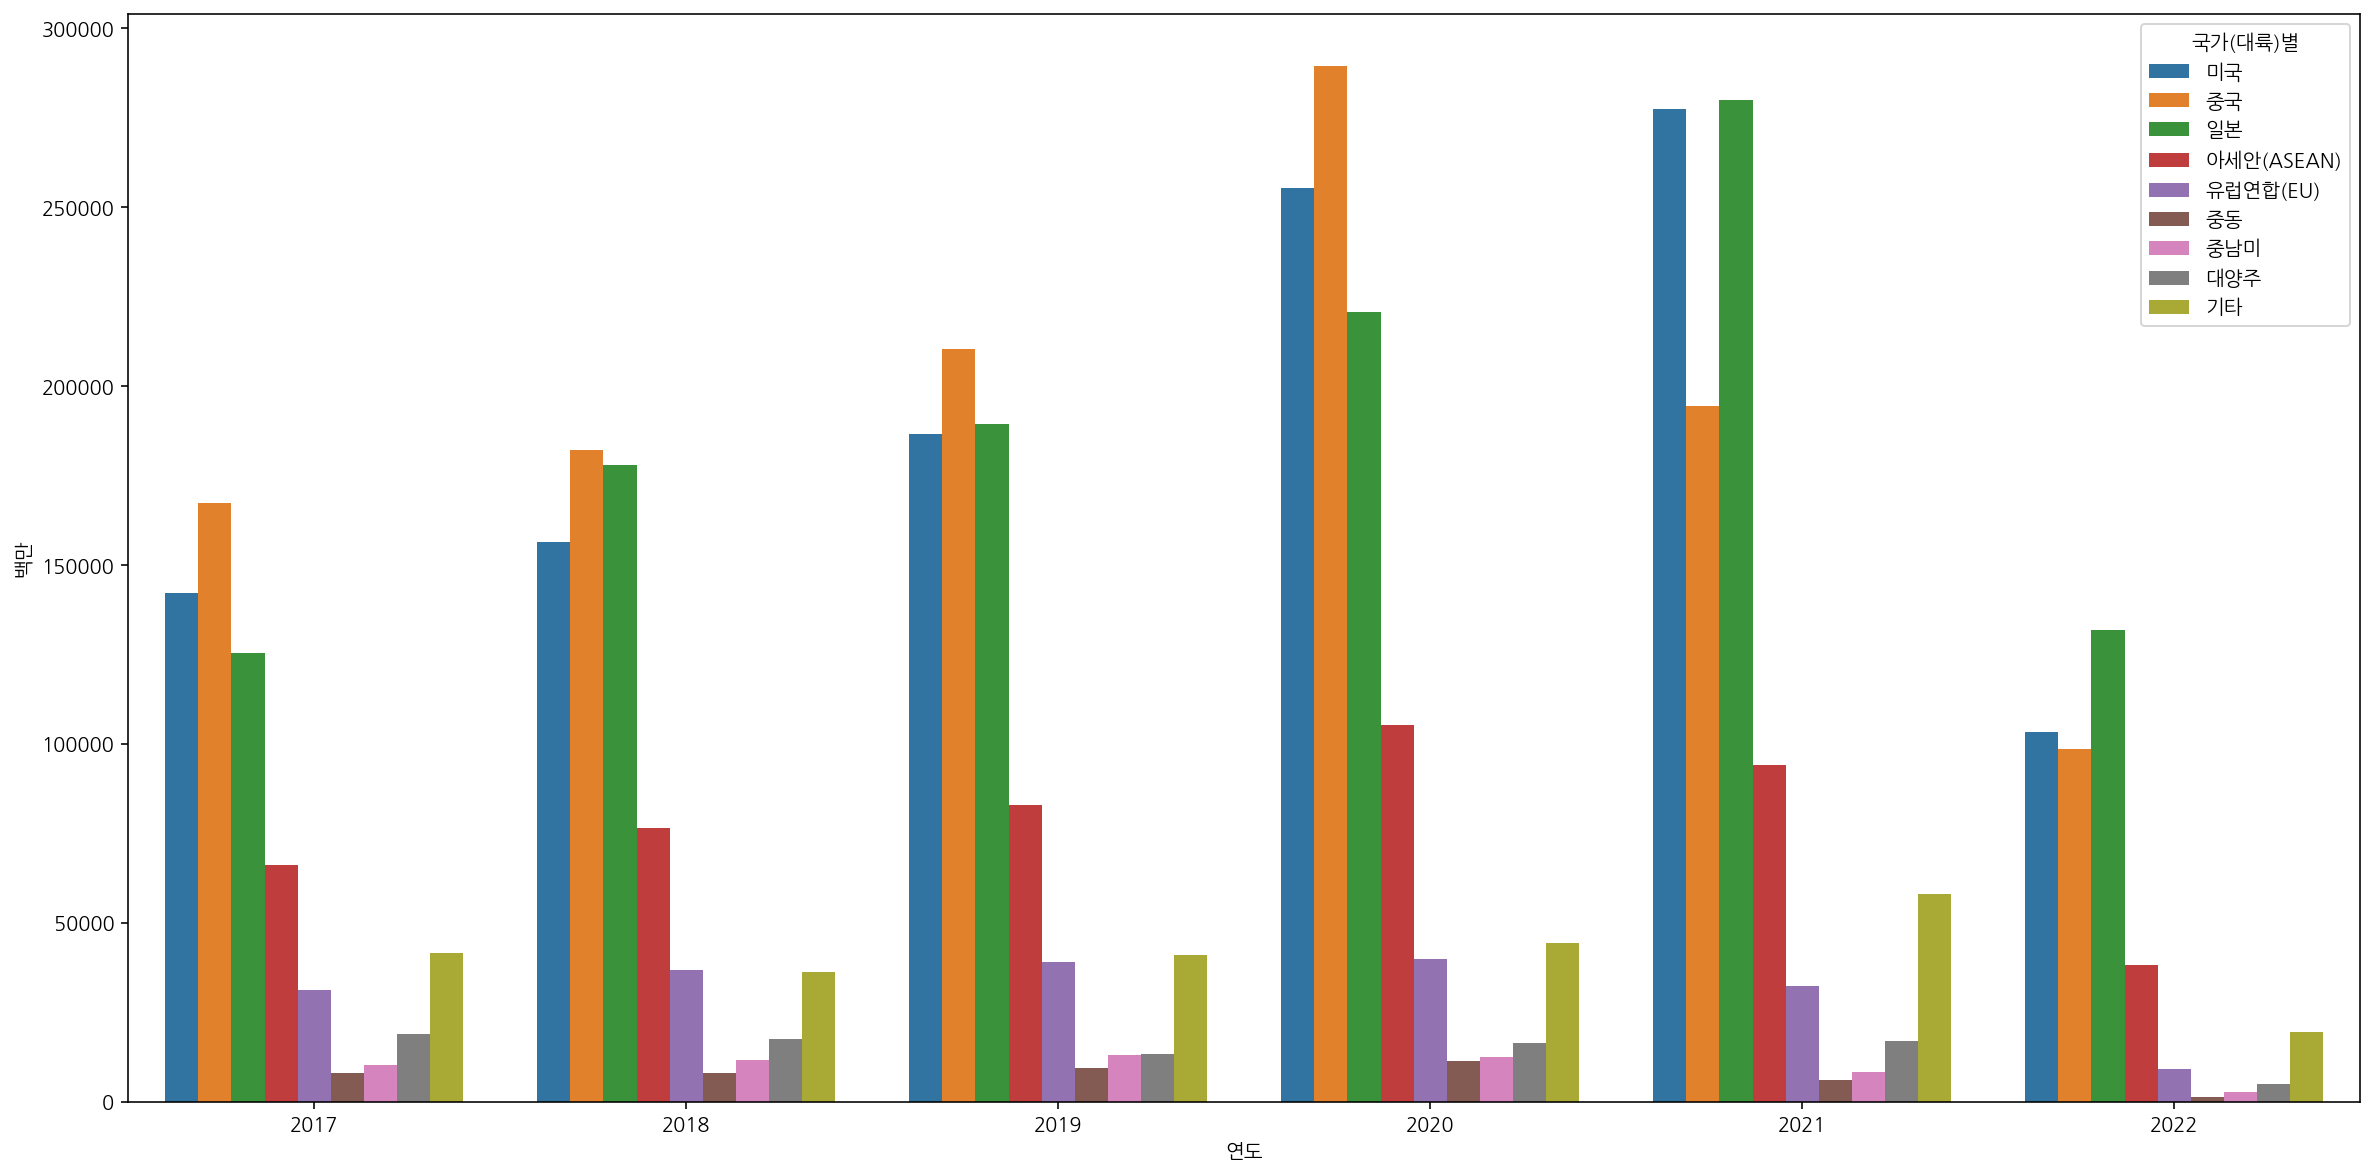

In [253]:
plt.figure(figsize=(20,10))
sns.barplot(data = df, x = '연도', y = '백만', hue = '국가(대륙)별', ci=None, estimator = sum)

개인적으로 지역별 판매액은 barplot이 보기 편한 것 같아 barplot으로 그렸다. 전체적으로 온라인 해외판매량이 증가하는 추세를 확인할 수 있다. 2022년은 4분기 데이터가 집계되지 않아 낮게 나타나는 것으로 확인되지만 2022년은 우크라-러 전쟁으로 인한 원자재 상승, 인플레이션, 중국의 코로나 봉쇄 등의 글로벌 악재가 겹치며 매우 힘든 해이므로 해외판매량이 낮을 것으로 예상된다. 해외판매량에서 미/중/일이 차지하는 비율이 굉장히 높은 것으로 파악된다. 

In [254]:
#Q3
df_2020 = df[df['연도'] == 2020].copy()
df_2020 = df_2020[['상품군별', '국가(대륙)별', '백만']]                   #연도와 분기를 제외한 칼럼들만 가져옴

df_2020.groupby(['상품군별', '국가(대륙)별']).agg(sum).sort_values(by='백만', ascending=False).head(10)

백만
상품군별         국가(대륙)별           
음반·비디오·악기    중국          125078
의류 및 패션 관련상품 일본          119452
             미국           82154
             중국           73068
화장품          미국           49446
             일본           42215
             중국           38855
기 타          미국           38731
의류 및 패션 관련상품 아세안(ASEAN)   37992
음반·비디오·악기    미국           32919

In [255]:
df_2019 = df[df['연도'] == 2019].copy()
df_2019 = df_2019[['상품군별', '국가(대륙)별', '백만']]                   #연도와 분기를 제외한 칼럼들만 가져옴

df_2019.groupby(['상품군별', '국가(대륙)별']).agg(sum).sort_values(by='백만', ascending=False).head(10)

백만
상품군별         국가(대륙)별           
의류 및 패션 관련상품 일본          131538
             중국           77844
화장품          중국           59445
의류 및 패션 관련상품 미국           55125
화장품          미국           41786
음반·비디오·악기    중국           36193
의류 및 패션 관련상품 아세안(ASEAN)   25420
기 타          일본           22813
             미국           21343
음반·비디오·악기    미국           19596

2019, 2020년의 온라인 해외판매량 상위 10개 그룹만 가져왔다. 2019년엔 미/중/일/아세안 향 패션상품, 화장품 등이 인기를 끌었다. 2020년엔 음반, 비디오, 악기 상품이 인기를 끌었던 것을 확인할 수 있다. 반면 화장품 상품에선 약간의 둔화를 보였다. 2020년은 K-drama, K-pop의 호황이 있었던 시기로 판단할 수 있다.

In [256]:
#Q4
col = ['미국', '중국', '일본']

df_top3 = df[df['국가(대륙)별'].isin(col)]          #isin을 통해 미국, 중국, 일본인 것만 불린인덱싱
df_top3['국가(대륙)별'].unique()

array(['미국', '중국', '일본'], dtype=object)

In [257]:
drop_index = df_top3[df_top3['연도'] == 2022].index.tolist()
df_top3.drop(drop_index, inplace=True)                             #2022년에 해당하는 데이터 drop


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [258]:
col2 = ['의류 및 패션 관련상품', '화장품', '음반·비디오·악기']
df_top3 = df_top3[df_top3['상품군별'].isin(col2)]             #isin을 통해 col2에 해당하는 데이터만 불린인덱싱
df_top3['상품군별'].unique()

array(['음반·비디오·악기', '의류 및 패션 관련상품', '화장품'], dtype=object)

In [268]:
df_top3['연도'] = df_top3['연도'].astype('str')            #str타입으로 다시 바꿔줌
df_top3['연도']

110    2017
111    2017
112    2017
113    2017
114    2018
       ... 
807    2020
808    2021
809    2021
810    2021
811    2021
Name: 연도, Length: 180, dtype: object

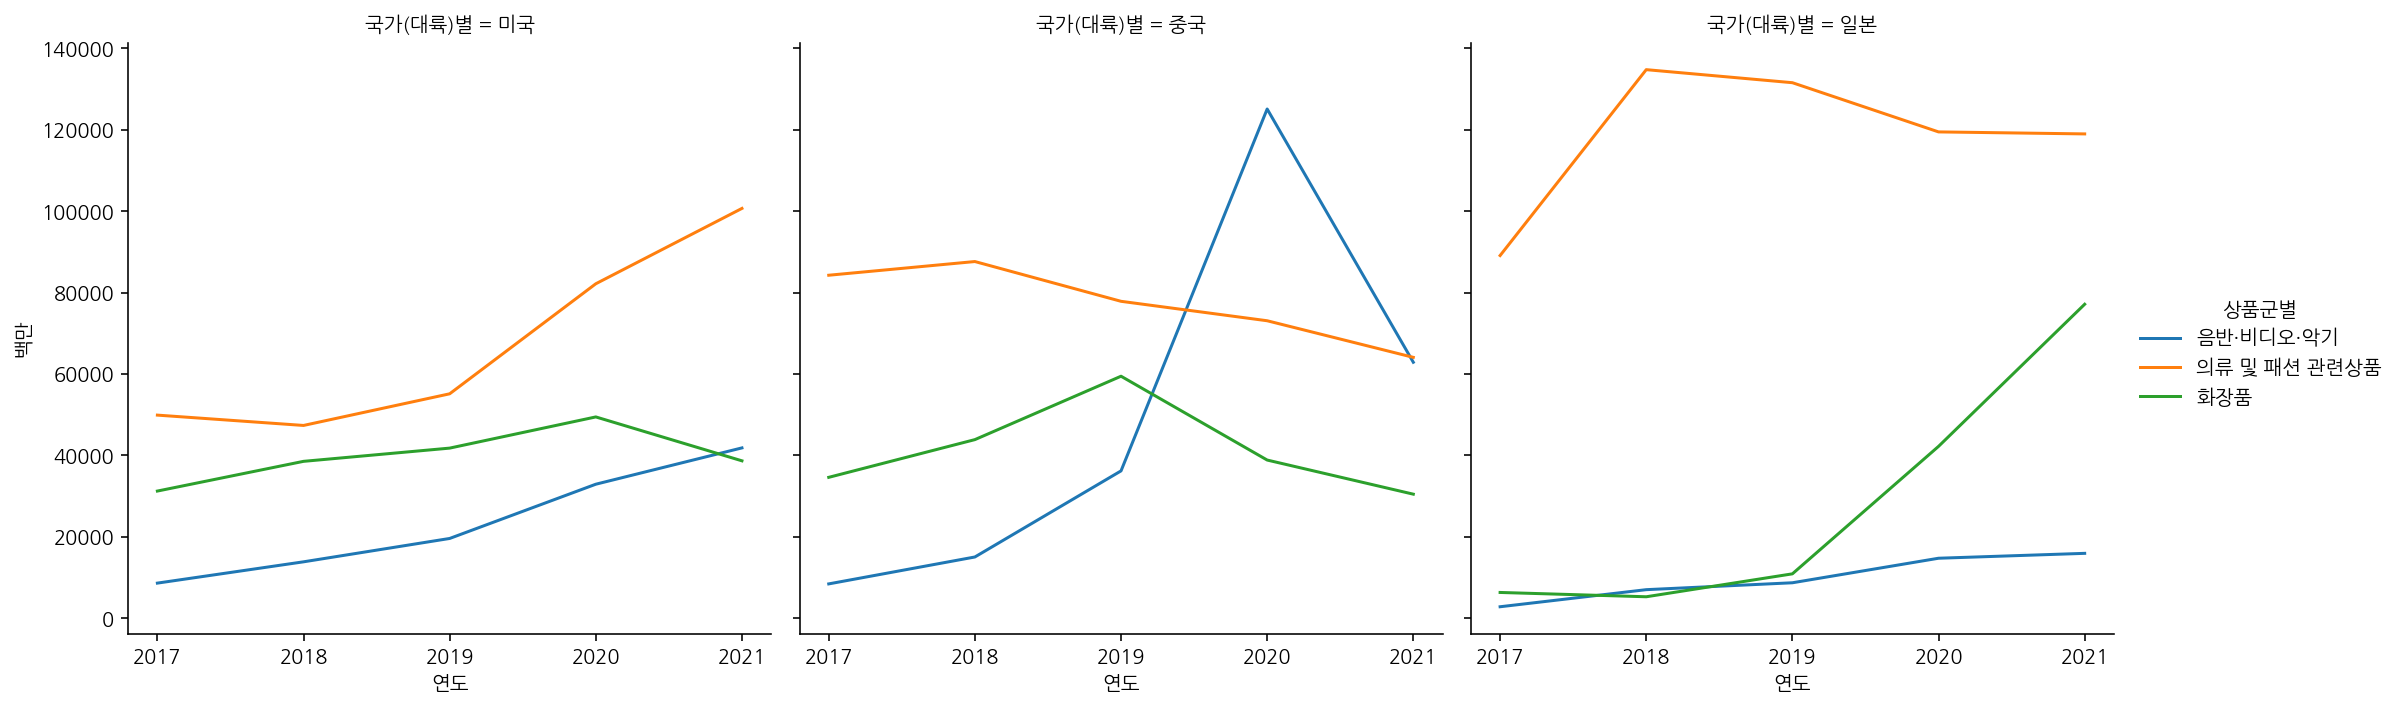

In [294]:
sns.relplot(data=df_top3, x='연도', y='백만', hue='상품군별', col='국가(대륙)별', kind='line',  estimator=sum, ci=None)

미국에선 3개의 상품군들의 온라인 판매액이 모두 증가하는 추세. 화장품은 잠깐 주춤
중국에선 음반 비디오 악기 상품의 온라인 판매액이 급성장했다가 다시 하락 추세. 전체 상품군에서 하락세를 보임
일본에선 화장품의 온라인 판매액의 증가가 뚜렷하게 보임. 다른 상품들은 하락세를 보임.
패션 관련상품은 꾸준히 높은 판매액을 기록 중. 특히 일본에서 좋은 성과를 보임

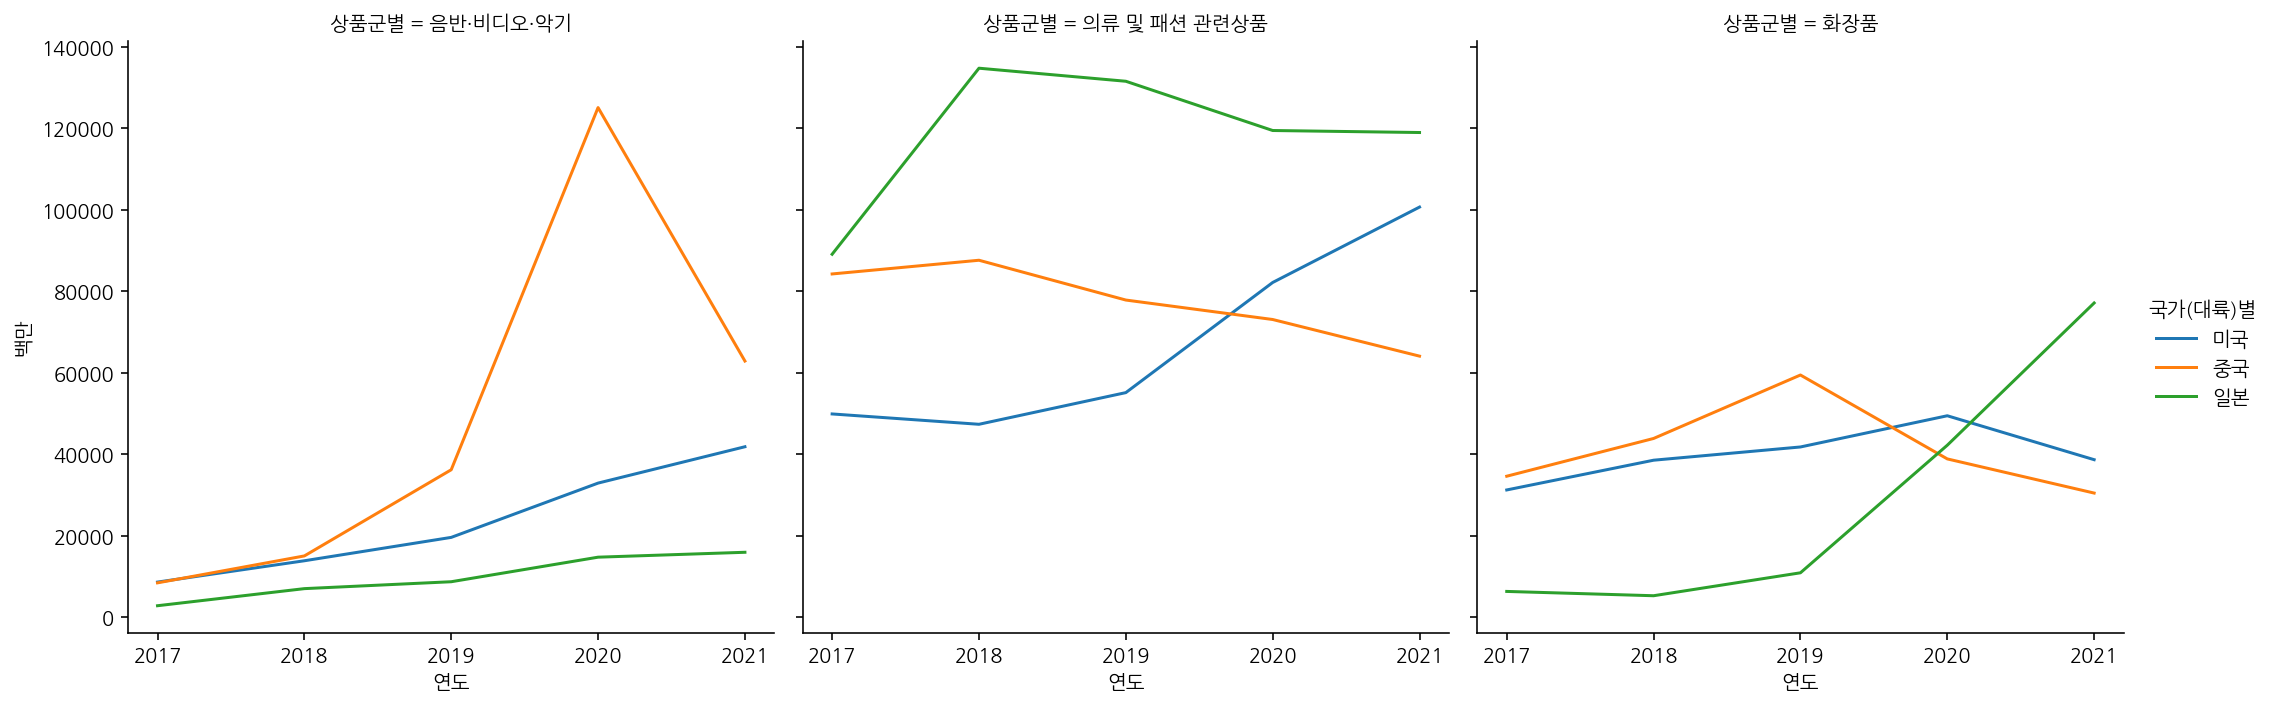

In [295]:
sns.relplot(data=df_top3, x='연도', y='백만', hue='국가(대륙)별', col='상품군별', kind='line',  estimator=sum, ci=None)

K-pop, K-drama, K-fashion, K-beauty 모두 관련 상품들의 판매액의 증가에 지대한 영향을 미친 것으로 보임. 그러나 최근엔 세계적 경기불황으로 감소할 것으로 전망함

In [ ]:
#Q5